In [38]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

In [39]:
# Read the data
df = pd.read_csv('seattle-weather.csv')

In [40]:
# Print the first 10 rows of the data
df.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [44]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [45]:
# Check missing values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [46]:
# Drop the date column
df.drop('date', axis=1, inplace=True)

In [47]:
# Get the most important features
df.corr()

C:\Users\ACER\AppData\Local\Temp\ipykernel_1044\2149679197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


C:\Users\ACER\AppData\Local\Temp\ipykernel_1044\1005738944.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

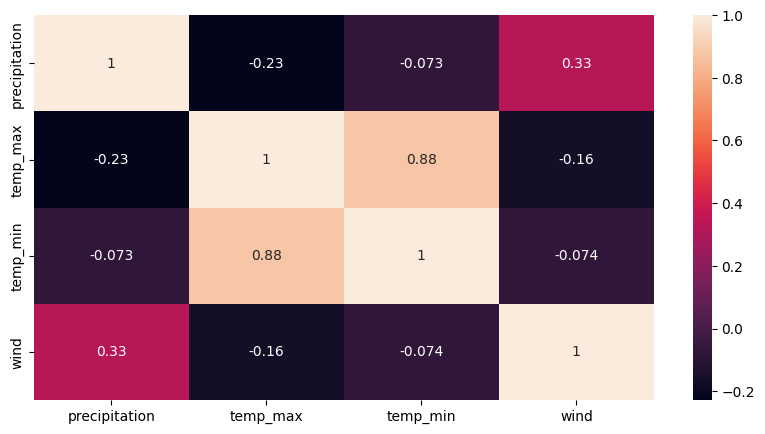

In [48]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [49]:
#drop the columns with low correlation
df.drop('temp_max', axis=1, inplace=True) #temp_max
df.drop('wind', axis=1, inplace=True) #wind
df.drop('weather', axis=1, inplace=True) #weather


In [50]:
# Only get the most correlated features
df.head(5)


,precipitation,temp_min
0,0.0,5.0
1,10.9,2.8
2,0.8,7.2
3,20.3,5.6
4,1.3,2.8


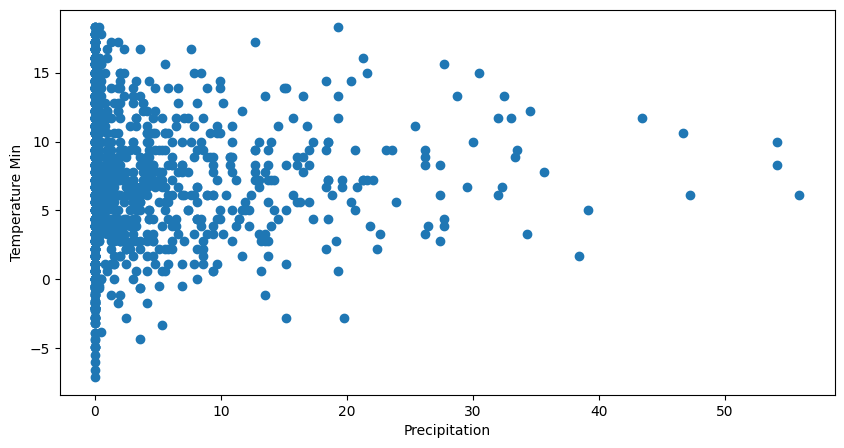

In [51]:
# Plot the data
plt.scatter(df['precipitation'], df['temp_min'])
plt.xlabel('Precipitation')
plt.ylabel('Temperature Min')
plt.show()

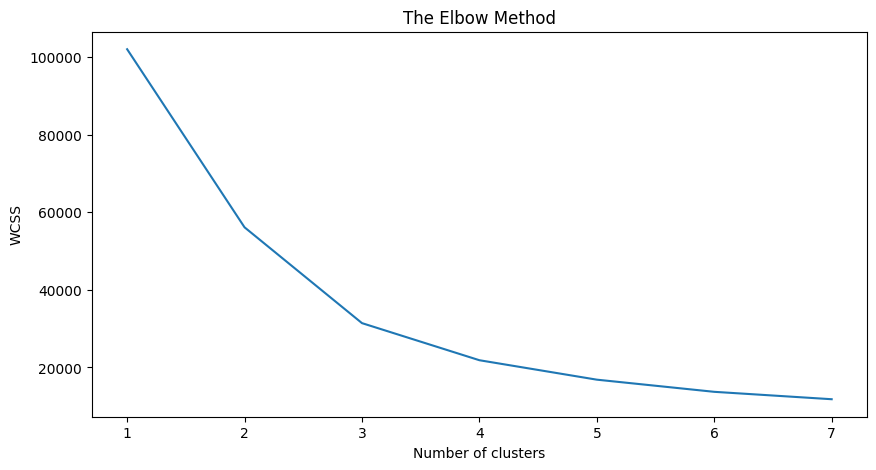

In [52]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
# Fit the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df)

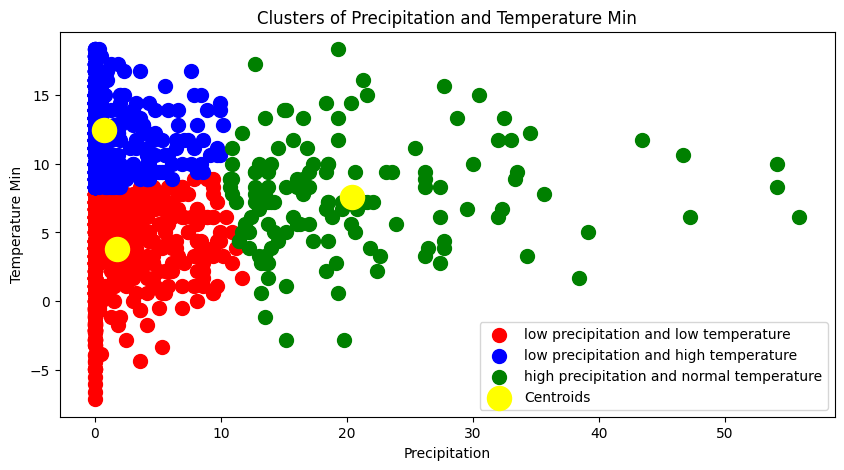

In [54]:
# Plot the clusters
plt.scatter(df[y_kmeans == 0]['precipitation'], df[y_kmeans == 0]['temp_min'], s=100, c='red', label='low precipitation and low temperature')
plt.scatter(df[y_kmeans == 1]['precipitation'], df[y_kmeans == 1]['temp_min'], s=100, c='blue', label='low precipitation and high temperature')
plt.scatter(df[y_kmeans == 2]['precipitation'], df[y_kmeans == 2]['temp_min'], s=100, c='green', label='high precipitation and normal temperature')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Precipitation and Min Temperature')
plt.xlabel('Precipitation')
plt.ylabel('Min Temperature')
plt.legend()
plt.show()

In [55]:
# Add new column to the data
df['Cluster'] = y_kmeans

In [56]:
# Show the first 5 rows of the data
df.head(5)

,precipitation,temp_min,Cluster
0,0.0,5.0,0
1,10.9,2.8,0
2,0.8,7.2,0
3,20.3,5.6,2
4,1.3,2.8,0


In [57]:
# Data type of the Cluster column
df['Cluster'].dtype

dtype('int32')

In [58]:
df['Cluster'].unique()

array([0, 2, 1])

In [59]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))